In [157]:
import numpy as np
import matplotlib.pyplot as plt
import doc_func as df
import utils
import utilsplot
import sympy
sympy.init_printing()

## NS
#### No poles in RHP of S, SG, Ks, TI

In [158]:
s = sympy.symbols('s')

G = 11/(75*s + 1)*sympy.Matrix([[87.8, -86.4], [108.2, -109.6]])
K = 0.7/s*G.inv()

In [159]:
Wis = (s + 0.2)/(0.5*s + 1)
Wps = (s/2 + 0.05)/s

In [160]:
I = sympy.Matrix([[1, 0], [0, 1]])

l = 0.7/s
ϵ = s/(s + 0.7)
t = 1/(1.43*s + 1)

L = l*I
S = ϵ*I
T = t*I

In [161]:
S, S*G, (K*S), (K*S*G)

⎛⎡   s            ⎤  ⎡      965.8⋅s              -950.4⋅s       ⎤  ⎡0.7⋅(2.723
⎜⎢───────     0   ⎥  ⎢────────────────────  ────────────────────⎥  ⎢──────────
⎜⎢s + 0.7         ⎥  ⎢(s + 0.7)⋅(75⋅s + 1)  (s + 0.7)⋅(75⋅s + 1)⎥  ⎢          
⎜⎢                ⎥, ⎢                                          ⎥, ⎢          
⎜⎢            s   ⎥  ⎢      1190.2⋅s             -1205.6⋅s      ⎥  ⎢0.7⋅(2.688
⎜⎢   0     ───────⎥  ⎢────────────────────  ────────────────────⎥  ⎢──────────
⎝⎣         s + 0.7⎦  ⎣(s + 0.7)⋅(75⋅s + 1)  (s + 0.7)⋅(75⋅s + 1)⎦  ⎣          

29711105224⋅s + 0.0363106281473632)  0.7⋅(-2.14683275907768⋅s - 0.028624436787
───────────────────────────────────  ─────────────────────────────────────────
         s + 0.7                                        s + 0.7               
                                                                              
51046912274⋅s + 0.0358468062549699)  0.7⋅(-2.18161940100718⋅s - 0.029088258680
───────────────────────────────────  ──────────────

## NP, RS

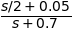

In [162]:
(Wps*S[0])

In [163]:
w = np.logspace(-3, 3, 1000)
s = 1j*w

In [164]:
def Wi(s):
    return (s + 0.2)/(0.5*s + 1)
def Wp(s):
    return (s/2 + 0.05)/s

In [165]:
def ϵ(s):
    return s/(s + 0.7)
def t(s):
    return 1/(1.43*s + 1)

In [167]:
Wpϵ = [abs(Wp(si)*ϵ(si)) for si in s]
Wit = [abs(Wi(si)*t(si)) for si in s]

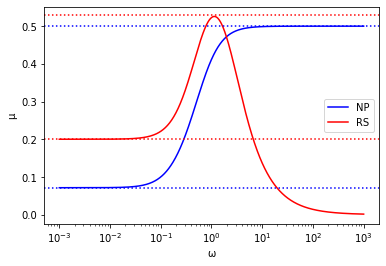

In [168]:
plt.semilogx(w, Wpϵ, c='blue', label='NP')
plt.semilogx(w, Wit, c='red', label='RS')
plt.legend()
plt.xlabel('ω')
plt.ylabel('μ')
plt.axhline(0.07, c='b', ls=':')
plt.axhline(0.5, c='b', ls=':')

plt.axhline(0.53, c='red', ls=':')
plt.axhline(0.2, c='red', ls=':')
plt.show()

#### NP is easily satified: 
 - Small at low freq (0.05/0.7 = 0.07 at w = 0) and approches 1/2 = 0.5 at higher freq
 
#### RS is easily satified: 
 - Peak is ||M||$_{\infty}$ = 0.53 -> we can increase uncertainty by a factor of 1/0.53 = 1.89 before the worst case uncertainty yields instability -> can tolerate gain of 38% and time delay of 1.7min before instability

In [151]:
0.2*1.89, np.pi*0.53

## RP

In [169]:
def G(s):
    return 11/(75*s + 1)*np.matrix([[87.8, -86.4], [108.2, -109.6]])

In [170]:
def γ(G):
    sigmas = utils.SVD(G)[1]
    return max(sigmas)/min(sigmas)

In [174]:
def μΔ(si):
    return np.sqrt(abs(Wp(si)*ϵ(si))**2 + abs(Wi(si)*t(si))**2 + abs(Wp(si)*ϵ(si))*abs(Wi(si)*t(si))*(γ(G(si)) + 1/γ(G(si))))

In [175]:
RPs = [μΔ(si) for si in s]
μΔ(1j)

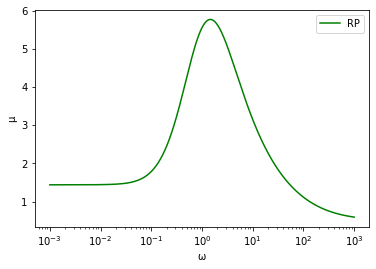

In [178]:
plt.semilogx(w, RPs, c='green', label='RP')
plt.legend()
plt.xlabel('ω')
plt.ylabel('μ')

plt.show()